In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import geom

In [2]:
# Generate a list the number subject to a Geometric distribution with parameter p
p = 1/6
tries = geom.rvs(p, size=1000, random_state=8)
tries[:10]

array([12, 19, 12,  5,  2,  1,  4,  3,  5,  4], dtype=int64)

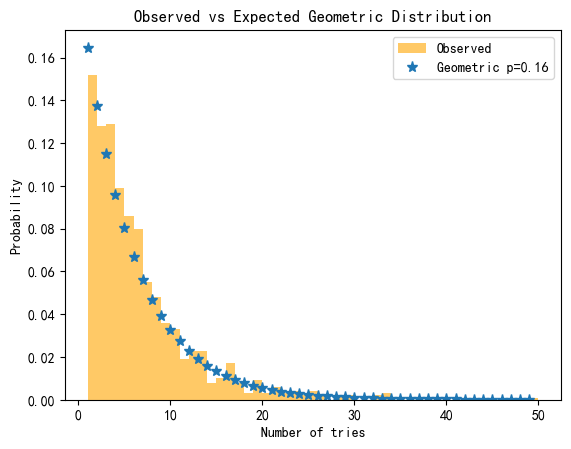

Average number of trials: 6.07
Estimated probability of success: p = 0.165


In [3]:
# Compute the average number of trials (sample mean)
mean_tries = np.mean(tries)

# Estimate the probability of success (p)
p = 1 / mean_tries

# Plot the observed data (histogram) and the expected Geometric distribution
plt.hist(tries, bins=range(1, max(tries) + 2), density=True, alpha=0.6, color='orange', label='Observed')

# Generate the x values (possible number of trials) and the corresponding Geometric PMF
x = np.arange(1, max(tries) + 1)
y = geom.pmf(x, p)

# Plot the expected Geometric distribution
plt.plot(x, y, '*', ms=8, label=f'Geometric p={p:.2f}')

plt.xlabel('Number of tries')
plt.ylabel('Probability')
plt.legend()
plt.title('Observed vs Expected Geometric Distribution')
plt.show()

print(f"Average number of trials: {mean_tries:.2f}")
print(f"Estimated probability of success: p = {p:.3f}")


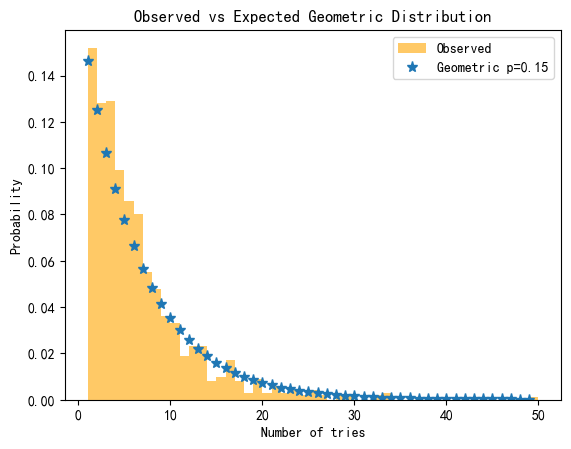

Average number of trials: 6.83
Estimated probability of success: p = 0.146


In [4]:
# Now given a small sample of 30 tries, we can estimate the probability of success
tries_small = geom.rvs(p, size=30, random_state=8)

# Compute the average number of trials (sample mean)
mean_tries = np.mean(tries_small)

# Estimate the probability of success (p)
p = 1 / mean_tries

# Plot the observed data (histogram) and the expected Geometric distribution
plt.hist(tries, bins=range(1, max(tries) + 2), density=True, alpha=0.6, color='orange', label='Observed')

# Generate the x values (possible number of trials) and the corresponding Geometric PMF
x = np.arange(1, max(tries) + 1)
y = geom.pmf(x, p)

# Plot the expected Geometric distribution
plt.plot(x, y, '*', ms=8, label=f'Geometric p={p:.2f}')

plt.xlabel('Number of tries')
plt.ylabel('Probability')
plt.legend()
plt.title('Observed vs Expected Geometric Distribution')
plt.show()

print(f"Average number of trials: {mean_tries:.2f}")
print(f"Estimated probability of success: p = {p:.3f}")


# Q2

In [5]:
from scipy.stats import chisquare

In [6]:
# Observed data: counts of each color in your sample
observed_counts = np.array([108, 133, 103, 139, 133, 96])
total_count = observed_counts.sum()

# Cleveland factory expected proportions for each color
cleveland_proportions = np.array([0.131, 0.205, 0.135, 0.198, 0.207, 0.124])

# Hackettstown factory expected proportions for each color
hackettstown_proportions = np.array([0.125, 0.25, 0.125, 0.125, 0.25, 0.125])

# Calculate expected counts for each color under both factories' distributions
expected_counts_cleveland = total_count * cleveland_proportions
expected_counts_hacketstown = total_count * hackettstown_proportions

In [7]:
# Perform Chi-square goodness-of-fit test for Cleveland distribution
chi2_stat_cleveland, p_value_cleveland = chisquare(f_obs=observed_counts, f_exp=expected_counts_cleveland)

# Perform Chi-square goodness-of-fit test for Hacketstown distribution
chi2_stat_hacketstown, p_value_hacketstown = chisquare(f_obs=observed_counts, f_exp=expected_counts_hacketstown)

# Print the results
print(f"Chi-square test for Cleveland: chi2={chi2_stat_cleveland:.2f}, p-value={p_value_cleveland:.4f}")
print(f"Chi-square test for Hacketstown: chi2={chi2_stat_hacketstown:.2f}, p-value={p_value_hacketstown:.4f}")

Chi-square test for Cleveland: chi2=6.07, p-value=0.2991
Chi-square test for Hacketstown: chi2=57.65, p-value=0.0000


Thus, The sample data is more likely to come from the Cleveland factory.